In [34]:
import h5py
import networkx as nx
import os
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16,8)
import seaborn as sns
sns.set(style='white', palette='muted', font_scale=2.0)
cl_path = '/connectivity/fpl/value'

In [35]:
h5 = {f: h5py.File(f, 'r') for f in os.listdir('.') if f.endswith('h5')}

In [36]:
normal_h5 = h5['normal_1.0_1e-05_12345.h5']

In [39]:
def calculate_b_t(input_bl):
    b_t = []
    for cl in input_bl:
        b_t.append(len([x for x in cl if -1 not in x]))
    return b_t

In [ ]:
b_t = calculate_b_t(normal_h5[cl_path])
b_t_diss = calculate_b_t(h5['diss_1.0_1e-05_12345.h5'][cl_path])

In [45]:
b_t_diss_09 = calculate_b_t(h5['diss_0.9_1.0_1e-05_12345.h5'][cl_path])

In [48]:
b_t_diss_deact_2 = calculate_b_t(h5['diss_0.9_deactivate_1.0_1e-05_12345.h5'][cl_path])

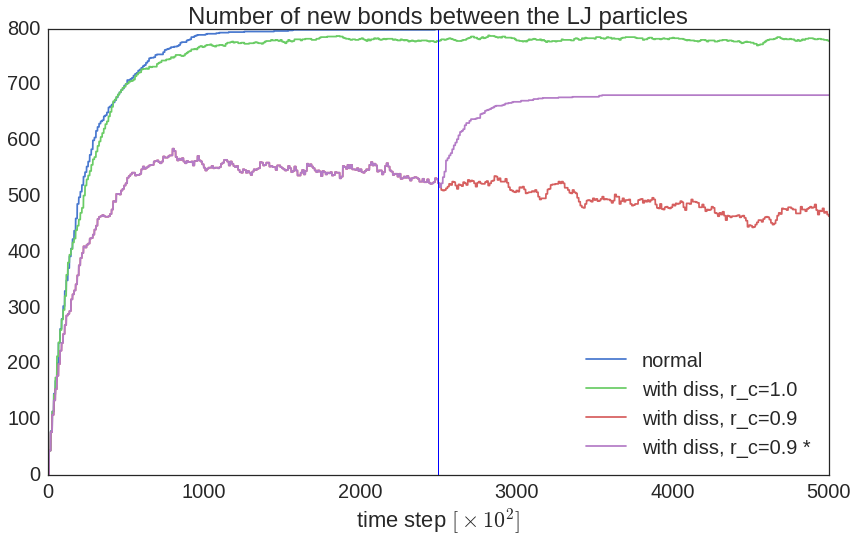

In [61]:
rcParams['figure.figsize'] = (14,8)
plt.plot(b_t, label='normal')
plt.plot(b_t_diss, label='with diss, r_c=1.0')
plt.plot(b_t_diss_09, label='with diss, r_c=0.9')
plt.plot(b_t_diss_deact_2, label='with diss, r_c=0.9 *')
plt.axvline(x=2500, linewidth=1.0)
plt.legend(loc=0)
plt.title('Number of new bonds between the LJ particles')
plt.xlabel(r'time step $[\times 10^2]$')
plt.savefig('number_of_bonds.png', dpi=200)